ÉTAPE B : ENTRAÎNEMENT DU MODÈLE ML

B.1 — Chargement et exploration du dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Chargement du dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Création d'un DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print("="*80)
print("DATASET IRIS - INFORMATIONS GÉNÉRALES")
print("="*80)
print(f"\n📊 Forme du dataset : {df.shape}")
print(f"📊 Nombre de features : {X.shape[1]}")
print(f"📊 Nombre de classes : {len(np.unique(y))}")
print(f"📊 Classes : {iris.target_names.tolist()}")
print(f"\n📊 Statistiques du dataset :")
print(df.describe())
print(f"\n📊 Distribution des classes :")
print(df['species'].value_counts())

DATASET IRIS - INFORMATIONS GÉNÉRALES

📊 Forme du dataset : (150, 6)
📊 Nombre de features : 4
📊 Nombre de classes : 3
📊 Classes : ['setosa', 'versicolor', 'virginica']

📊 Statistiques du dataset :
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    

B.2 — Visualisations exploratoires (EDA)

B.2.1 — Distribution des classes

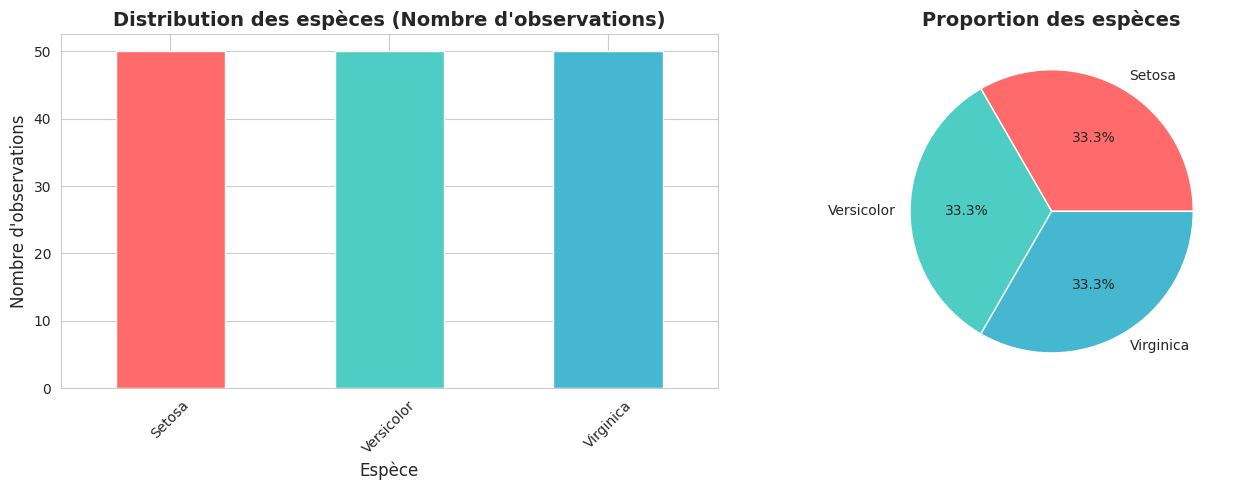

✓ Graphique sauvegardé : 1_distribution_classes.png


In [3]:
# Figure 1 : Distribution des classes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1 : Histogramme
df['species'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Distribution des espèces (Nombre d\'observations)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Nombre d\'observations', fontsize=12)
axes[0].set_xlabel('Espèce', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Graphique 2 : Pie chart
df['species'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                   colors=['#FF6B6B', '#4ECDC4', '#45B7D1'],
                                   labels=['Setosa', 'Versicolor', 'Virginica'])
axes[1].set_title('Proportion des espèces', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('1_distribution_classes.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique sauvegardé : 1_distribution_classes.png")

B.2.2 — Visualisation multidimensionnelle (Pairplot)

<Figure size 1400x1200 with 0 Axes>

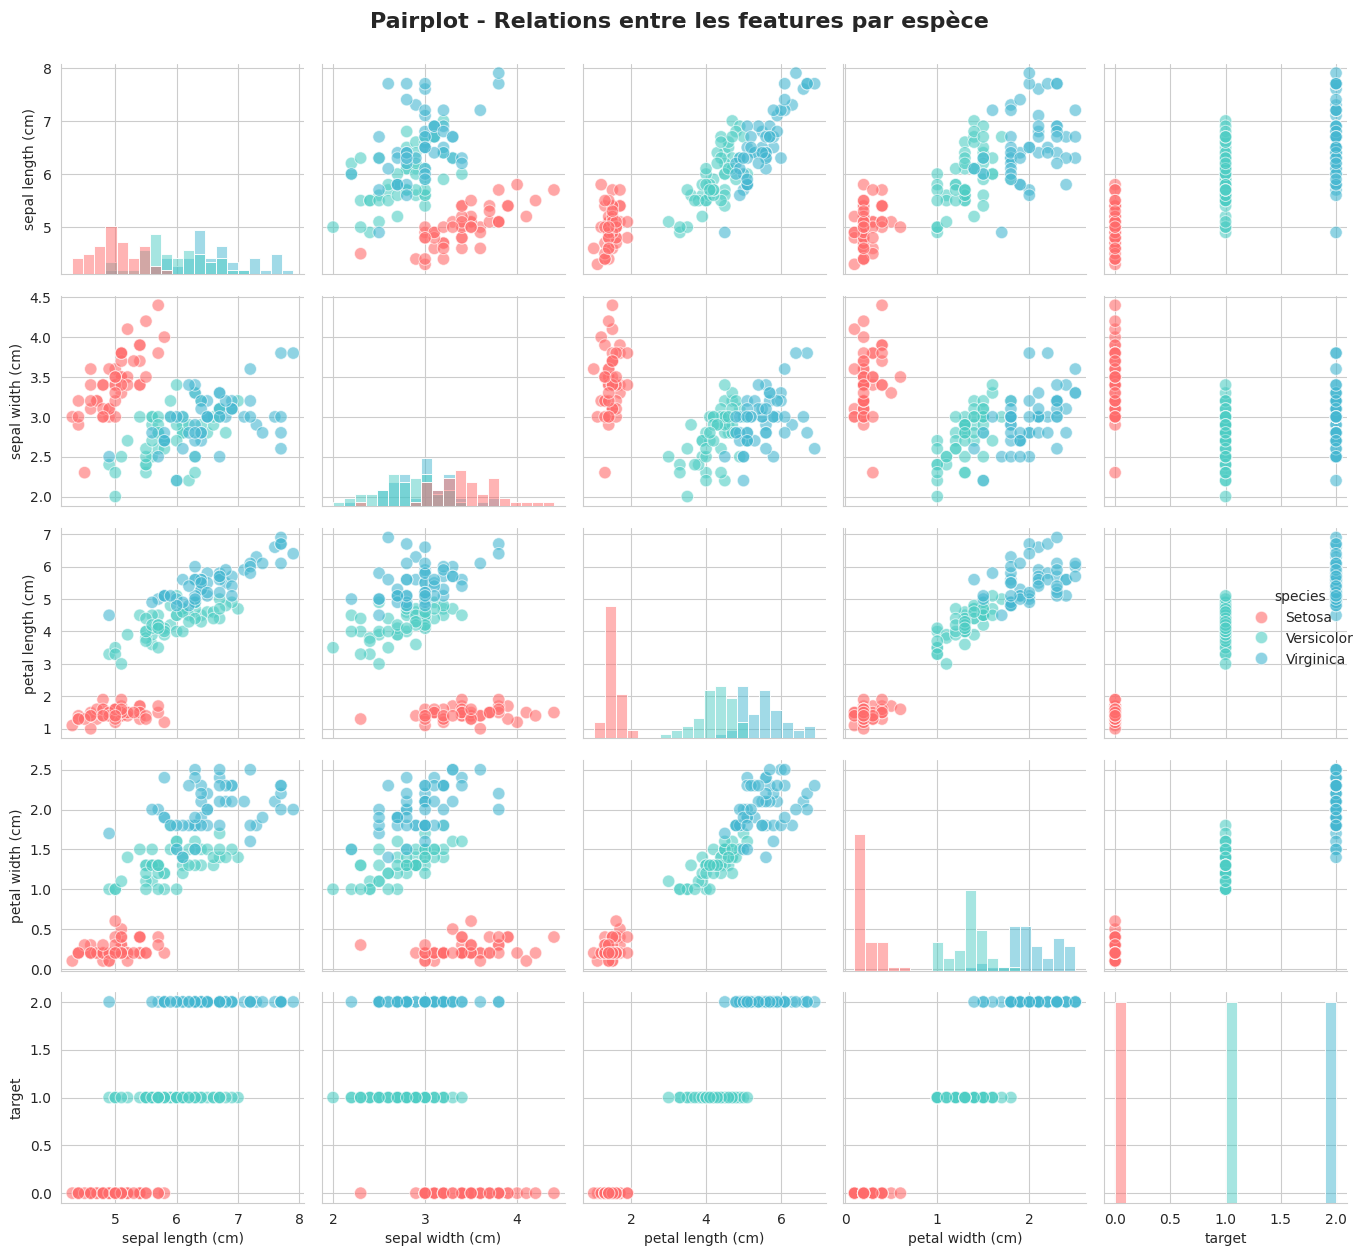

✓ Graphique sauvegardé : 2_pairplot.png


In [4]:
# Figure 2 : Pairplot - Relations entre features
fig = plt.figure(figsize=(14, 12))

# Pairplot avec seaborn
g = sns.pairplot(df, hue='species', diag_kind='hist',
                 palette={'Setosa': '#FF6B6B', 'Versicolor': '#4ECDC4', 'Virginica': '#45B7D1'},
                 plot_kws={'alpha': 0.6, 's': 80},
                 diag_kws={'bins': 20})

g.fig.suptitle('Pairplot - Relations entre les features par espèce',
               fontsize=16, fontweight='bold', y=1.001)

plt.tight_layout()
plt.savefig('2_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique sauvegardé : 2_pairplot.png")

B.2.3 — Heatmap de corrélation

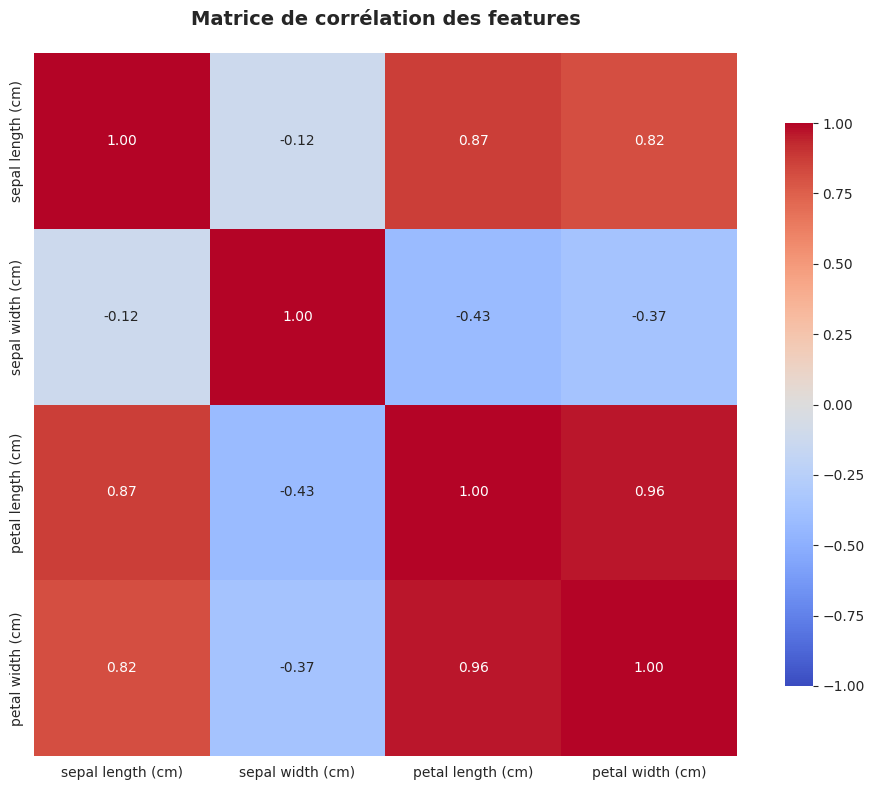

✓ Graphique sauvegardé : 3_correlation_heatmap.png


In [5]:
# Figure 3 : Matrice de corrélation
fig, ax = plt.subplots(figsize=(10, 8))

correlation_matrix = df.iloc[:, :-2].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1, center=0)

ax.set_title('Matrice de corrélation des features', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('3_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique sauvegardé : 3_correlation_heatmap.png")

B.2.4 — Boîtes à moustaches (Box plots)

/tmp/ipython-input-2734931277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, ax=axes[idx],
/tmp/ipython-input-2734931277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, ax=axes[idx],
/tmp/ipython-input-2734931277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y=feature, ax=axes[idx],
/tmp/ipython-input-2734931277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

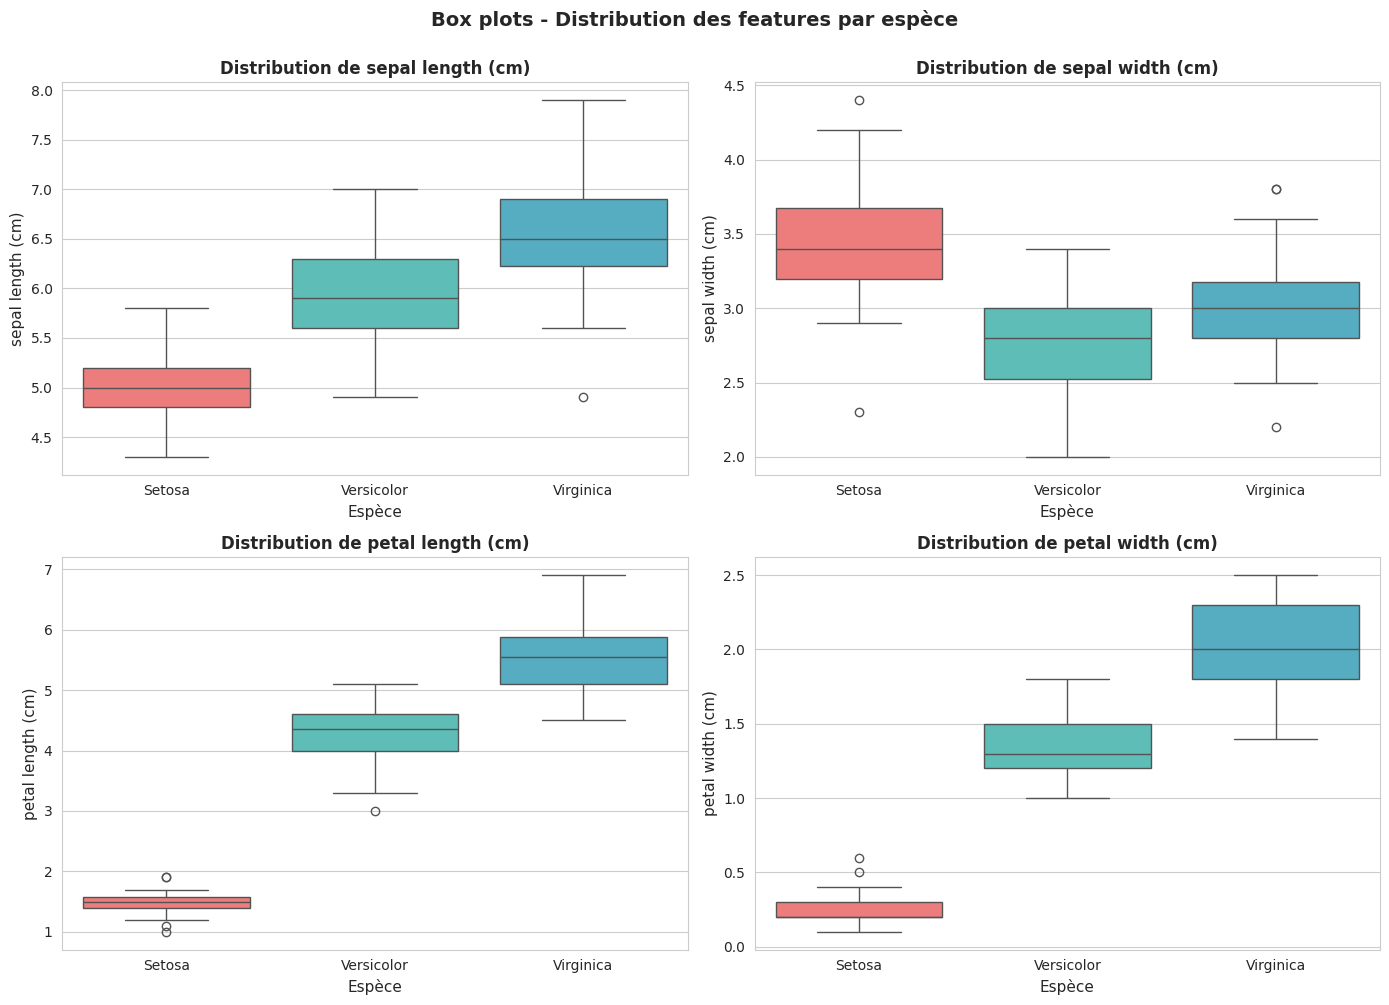

✓ Graphique sauvegardé : 4_boxplots.png


In [6]:
# Figure 4 : Box plots par feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

features = df.columns[:-2]
for idx, feature in enumerate(features):
    sns.boxplot(data=df, x='species', y=feature, ax=axes[idx],
                palette={'Setosa': '#FF6B6B', 'Versicolor': '#4ECDC4', 'Virginica': '#45B7D1'})
    axes[idx].set_title(f'Distribution de {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=11)
    axes[idx].set_xlabel('Espèce', fontsize=11)

plt.suptitle('Box plots - Distribution des features par espèce', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('4_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique sauvegardé : 4_boxplots.png")

B.3 — Préparation des données

In [7]:
print("\n" + "="*80)
print("PRÉPARATION DES DONNÉES")
print("="*80)

# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Split effectué :")
print(f"   - Taille train : {X_train.shape[0]} observations (80%)")
print(f"   - Taille test : {X_test.shape[0]} observations (20%)")

# Vérification du stratified split
print(f"\n✓ Distribution des classes en train :")
for i, class_name in enumerate(iris.target_names):
    count = (y_train == i).sum()
    print(f"   - {class_name} : {count} observations")

print(f"\n✓ Distribution des classes en test :")
for i, class_name in enumerate(iris.target_names):
    count = (y_test == i).sum()
    print(f"   - {class_name} : {count} observations")

# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Normalisation effectuée (StandardScaler) :")
print(f"   - Moyenne train (avant) : {X_train.mean():.4f}")
print(f"   - Moyenne train (après) : {X_train_scaled.mean():.4f}")
print(f"   - Std train (avant) : {X_train.std():.4f}")
print(f"   - Std train (après) : {X_train_scaled.std():.4f}")


PRÉPARATION DES DONNÉES

✓ Split effectué :
   - Taille train : 120 observations (80%)
   - Taille test : 30 observations (20%)

✓ Distribution des classes en train :
   - setosa : 40 observations
   - versicolor : 40 observations
   - virginica : 40 observations

✓ Distribution des classes en test :
   - setosa : 10 observations
   - versicolor : 10 observations
   - virginica : 10 observations

✓ Normalisation effectuée (StandardScaler) :
   - Moyenne train (avant) : 3.4663
   - Moyenne train (après) : -0.0000
   - Std train (avant) : 1.9750
   - Std train (après) : 1.0000


Visualisation : Avant/Après normalisation

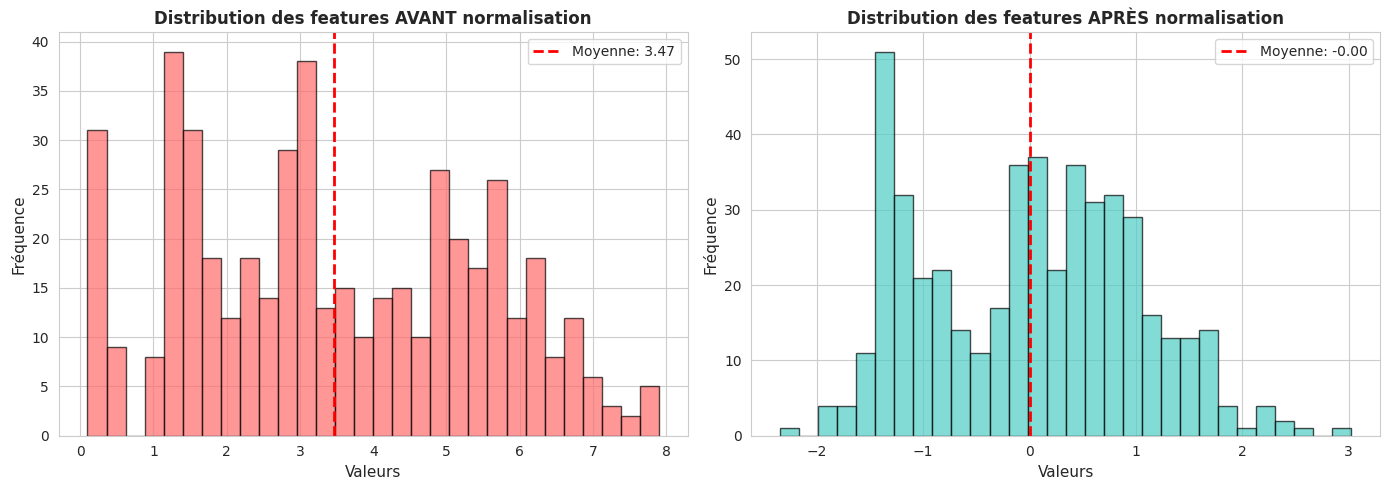

✓ Graphique sauvegardé : 5_normalization_comparison.png


In [8]:
# Figure 5 : Avant/Après normalisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Avant normalisation
axes[0].hist(X_train.flatten(), bins=30, color='#FF6B6B', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution des features AVANT normalisation', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Valeurs', fontsize=11)
axes[0].set_ylabel('Fréquence', fontsize=11)
axes[0].axvline(X_train.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {X_train.mean():.2f}')
axes[0].legend()

# Après normalisation
axes[1].hist(X_train_scaled.flatten(), bins=30, color='#4ECDC4', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution des features APRÈS normalisation', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Valeurs', fontsize=11)
axes[1].set_ylabel('Fréquence', fontsize=11)
axes[1].axvline(X_train_scaled.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {X_train_scaled.mean():.2f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('5_normalization_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique sauvegardé : 5_normalization_comparison.png")

B.4 — Entraînement de plusieurs modèles

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

print("\n" + "="*80)
print("ENTRAÎNEMENT DES MODÈLES")
print("="*80)

# Dictionnaire pour stocker les modèles et leurs performances
models_info = {}

# ============================================================================
# MODÈLE 1 : DECISION TREE
# ============================================================================
print("\n" + "-"*80)
print("MODÈLE 1 : DECISION TREE CLASSIFIER")
print("-"*80)

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=5)
dt_model.fit(X_train_scaled, y_train)

# Prédictions
dt_train_pred = dt_model.predict(X_train_scaled)
dt_test_pred = dt_model.predict(X_test_scaled)

# Métriques
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
dt_precision = precision_score(y_test, dt_test_pred, average='weighted')
dt_recall = recall_score(y_test, dt_test_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_test_pred, average='weighted')

print(f"\n📊 Hyperparamètres :")
print(f"   - max_depth : 5")
print(f"   - min_samples_split : 5")
print(f"   - random_state : 42")

print(f"\n📊 Performances :")
print(f"   - Accuracy (train) : {dt_train_accuracy:.4f} ({dt_train_accuracy*100:.2f}%)")
print(f"   - Accuracy (test)  : {dt_test_accuracy:.4f} ({dt_test_accuracy*100:.2f}%)")
print(f"   - Precision        : {dt_precision:.4f}")
print(f"   - Recall           : {dt_recall:.4f}")
print(f"   - F1-Score         : {dt_f1:.4f}")

models_info['Decision Tree'] = {
    'model': dt_model,
    'train_acc': dt_train_accuracy,
    'test_acc': dt_test_accuracy,
    'precision': dt_precision,
    'recall': dt_recall,
    'f1': dt_f1,
    'predictions': dt_test_pred,
    'confusion_matrix': confusion_matrix(y_test, dt_test_pred)
}

print(f"\n📋 Rapport de classification :")
print(classification_report(y_test, dt_test_pred, target_names=iris.target_names))

# ============================================================================
# MODÈLE 2 : RANDOM FOREST
# ============================================================================
print("\n" + "-"*80)
print("MODÈLE 2 : RANDOM FOREST CLASSIFIER")
print("-"*80)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10,
                                   random_state=42, min_samples_split=5)
rf_model.fit(X_train_scaled, y_train)

# Prédictions
rf_train_pred = rf_model.predict(X_train_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)

# Métriques
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
rf_precision = precision_score(y_test, rf_test_pred, average='weighted')
rf_recall = recall_score(y_test, rf_test_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_test_pred, average='weighted')

print(f"\n📊 Hyperparamètres :")
print(f"   - n_estimators : 100")
print(f"   - max_depth : 10")
print(f"   - min_samples_split : 5")
print(f"   - random_state : 42")

print(f"\n📊 Performances :")
print(f"   - Accuracy (train) : {rf_train_accuracy:.4f} ({rf_train_accuracy*100:.2f}%)")
print(f"   - Accuracy (test)  : {rf_test_accuracy:.4f} ({rf_test_accuracy*100:.2f}%)")
print(f"   - Precision        : {rf_precision:.4f}")
print(f"   - Recall           : {rf_recall:.4f}")
print(f"   - F1-Score         : {rf_f1:.4f}")

models_info['Random Forest'] = {
    'model': rf_model,
    'train_acc': rf_train_accuracy,
    'test_acc': rf_test_accuracy,
    'precision': rf_precision,
    'recall': rf_recall,
    'f1': rf_f1,
    'predictions': rf_test_pred,
    'confusion_matrix': confusion_matrix(y_test, rf_test_pred),
    'feature_importance': rf_model.feature_importances_
}

print(f"\n📋 Rapport de classification :")
print(classification_report(y_test, rf_test_pred, target_names=iris.target_names))

# ============================================================================
# MODÈLE 3 : LOGISTIC REGRESSION
# ============================================================================
print("\n" + "-"*80)
print("MODÈLE 3 : LOGISTIC REGRESSION")
print("-"*80)

lr_model = LogisticRegression(max_iter=200, random_state=42,
                               solver='lbfgs', multi_class='multinomial')
lr_model.fit(X_train_scaled, y_train)

# Prédictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Métriques
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)
lr_precision = precision_score(y_test, lr_test_pred, average='weighted')
lr_recall = recall_score(y_test, lr_test_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_test_pred, average='weighted')

print(f"\n📊 Hyperparamètres :")
print(f"   - max_iter : 200")
print(f"   - solver : lbfgs")
print(f"   - multi_class : multinomial")
print(f"   - random_state : 42")

print(f"\n📊 Performances :")
print(f"   - Accuracy (train) : {lr_train_accuracy:.4f} ({lr_train_accuracy*100:.2f}%)")
print(f"   - Accuracy (test)  : {lr_test_accuracy:.4f} ({lr_test_accuracy*100:.2f}%)")
print(f"   - Precision        : {lr_precision:.4f}")
print(f"   - Recall           : {lr_recall:.4f}")
print(f"   - F1-Score         : {lr_f1:.4f}")

models_info['Logistic Regression'] = {
    'model': lr_model,
    'train_acc': lr_train_accuracy,
    'test_acc': lr_test_accuracy,
    'precision': lr_precision,
    'recall': lr_recall,
    'f1': lr_f1,
    'predictions': lr_test_pred,
    'confusion_matrix': confusion_matrix(y_test, lr_test_pred)
}

print(f"\n📋 Rapport de classification :")
print(classification_report(y_test, lr_test_pred, target_names=iris.target_names))


ENTRAÎNEMENT DES MODÈLES

--------------------------------------------------------------------------------
MODÈLE 1 : DECISION TREE CLASSIFIER
--------------------------------------------------------------------------------

📊 Hyperparamètres :
   - max_depth : 5
   - min_samples_split : 5
   - random_state : 42

📊 Performances :
   - Accuracy (train) : 0.9833 (98.33%)
   - Accuracy (test)  : 0.9667 (96.67%)
   - Precision        : 0.9697
   - Recall           : 0.9667
   - F1-Score         : 0.9666

📋 Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


--------------------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


B.5 — Comparaison des modèles

In [10]:
print("\n" + "="*80)
print("COMPARAISON DES MODÈLES")
print("="*80)

# Tableau comparatif
comparison_df = pd.DataFrame({
    'Modèle': models_info.keys(),
    'Accuracy (Train)': [models_info[m]['train_acc'] for m in models_info],
    'Accuracy (Test)': [models_info[m]['test_acc'] for m in models_info],
    'Precision': [models_info[m]['precision'] for m in models_info],
    'Recall': [models_info[m]['recall'] for m in models_info],
    'F1-Score': [models_info[m]['f1'] for m in models_info]
})

print("\n" + comparison_df.to_string(index=False))

# Détection du meilleur modèle
best_model_name = comparison_df.loc[comparison_df['Accuracy (Test)'].idxmax(), 'Modèle']
best_accuracy = comparison_df['Accuracy (Test)'].max()

print(f"\n{'='*80}")
print(f"✓ MEILLEUR MODÈLE : {best_model_name}")
print(f"✓ ACCURACY : {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"{'='*80}")


COMPARAISON DES MODÈLES

             Modèle  Accuracy (Train)  Accuracy (Test)  Precision   Recall  F1-Score
      Decision Tree          0.983333         0.966667   0.969697 0.966667  0.966583
      Random Forest          0.983333         0.966667   0.969697 0.966667  0.966583
Logistic Regression          0.958333         0.933333   0.933333 0.933333  0.933333

✓ MEILLEUR MODÈLE : Decision Tree
✓ ACCURACY : 0.9667 (96.67%)


B.6 — Visualisations des performances

B.6.1 — Comparaison des précisions

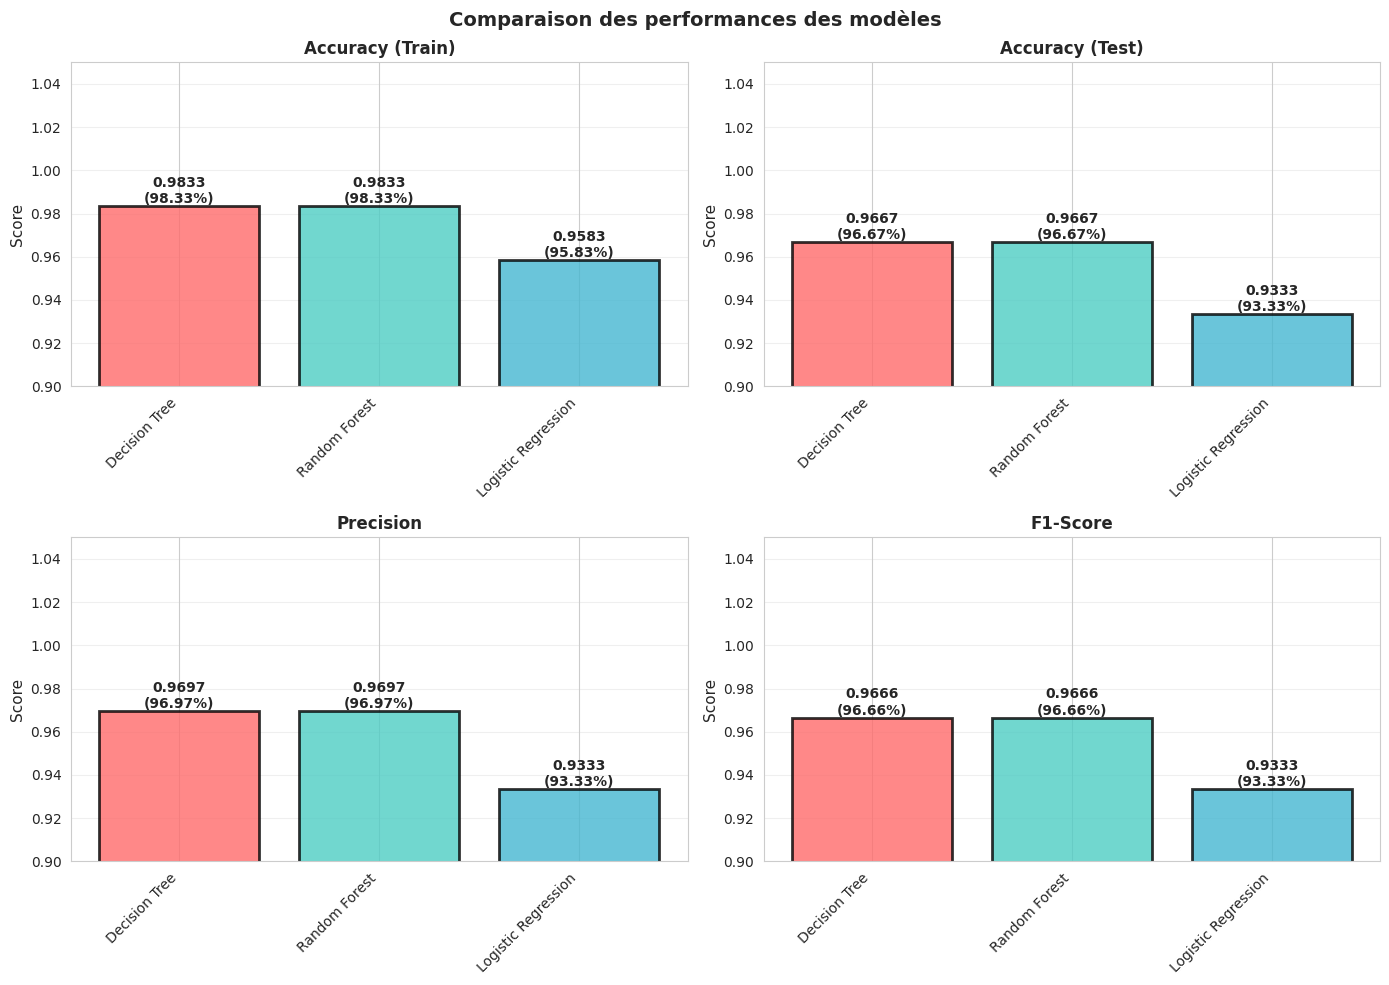

✓ Graphique sauvegardé : 6_models_comparison.png


In [11]:
# Figure 6 : Comparaison des métriques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy (Train)', 'Accuracy (Test)', 'Precision', 'F1-Score']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]

    if metric == 'Accuracy (Train)':
        values = [models_info[m]['train_acc'] for m in models_info]
    elif metric == 'Accuracy (Test)':
        values = [models_info[m]['test_acc'] for m in models_info]
    elif metric == 'Precision':
        values = [models_info[m]['precision'] for m in models_info]
    else:  # F1-Score
        values = [models_info[m]['f1'] for m in models_info]

    bars = ax.bar(models_info.keys(), values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}\n({height*100:.2f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=11)
    ax.set_ylim([0.9, 1.05])
    ax.grid(axis='y', alpha=0.3)

    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

plt.suptitle('Comparaison des performances des modèles', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('6_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique sauvegardé : 6_models_comparison.png")

B.6.2 — Matrice de confusion (Heatmaps)

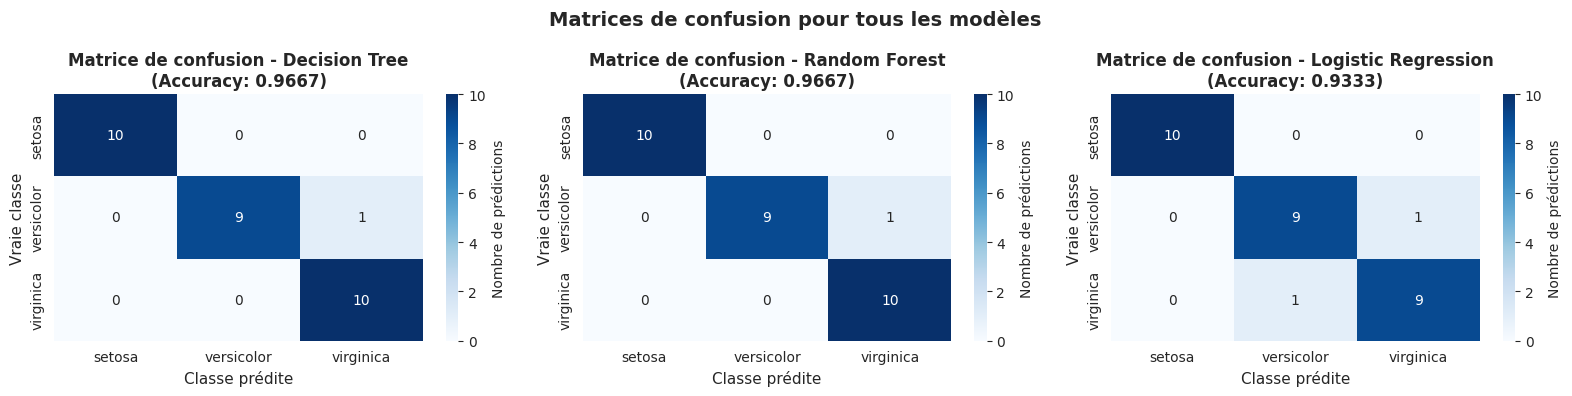

✓ Graphique sauvegardé : 7_confusion_matrices.png


In [12]:
# Figure 7 : Matrices de confusion
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for idx, (model_name, model_data) in enumerate(models_info.items()):
    cm = model_data['confusion_matrix']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=iris.target_names, yticklabels=iris.target_names,
                cbar_kws={'label': 'Nombre de prédictions'})

    axes[idx].set_title(f'Matrice de confusion - {model_name}\n(Accuracy: {model_data["test_acc"]:.4f})',
                       fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Vraie classe', fontsize=11)
    axes[idx].set_xlabel('Classe prédite', fontsize=11)

plt.suptitle('Matrices de confusion pour tous les modèles', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('7_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique sauvegardé : 7_confusion_matrices.png")

B.6.3 — Feature Importance (Random Forest)

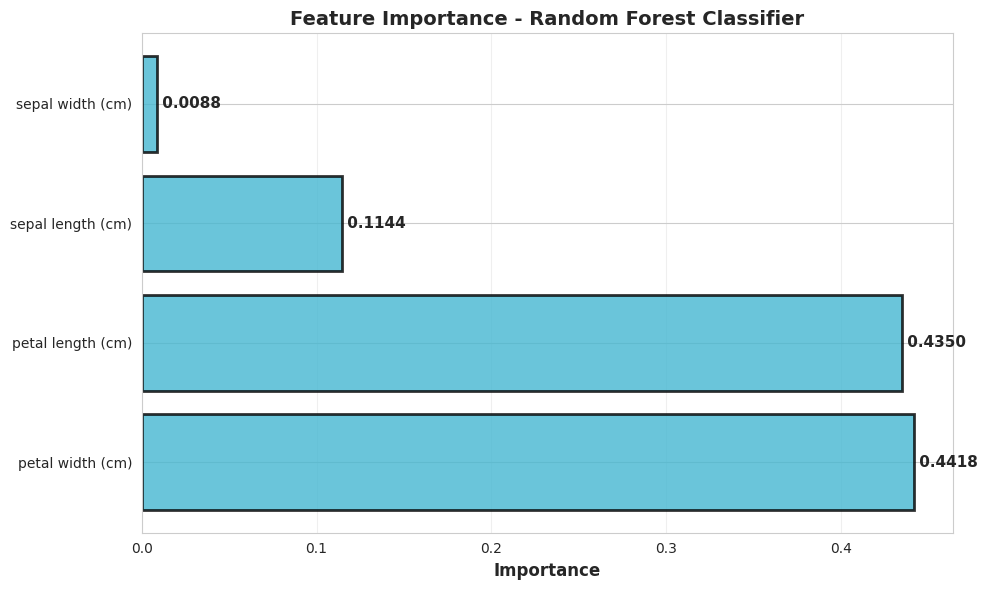

✓ Graphique sauvegardé : 8_feature_importance.png


In [13]:
# Figure 8 : Feature Importance du Random Forest
fig, ax = plt.subplots(figsize=(10, 6))

feature_importance = models_info['Random Forest']['feature_importance']
feature_names = iris.feature_names

# Tri par importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

bars = ax.barh(sorted_features, sorted_importance, color='#45B7D1', alpha=0.8, edgecolor='black', linewidth=2)

# Ajouter les valeurs
for i, (feature, importance) in enumerate(zip(sorted_features, sorted_importance)):
    ax.text(importance, i, f' {importance:.4f}', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_title('Feature Importance - Random Forest Classifier', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('8_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graphique sauvegardé : 8_feature_importance.png")

B.7 — Analyse des erreurs

In [15]:
print("\n" + "="*80)
print("ANALYSE DES ERREURS DU MEILLEUR MODÈLE (DECISION TREE)")
print("="*80)

best_model = models_info['Decision Tree']['model']
dt_predictions = models_info['Decision Tree']['predictions']

# Indices des prédictions incorrectes
incorrect_indices = np.where(dt_predictions != y_test)[0]

print(f"\n📊 Nombre de prédictions incorrectes : {len(incorrect_indices)}")
print(f"📊 Taux d'erreur : {len(incorrect_indices)/len(y_test)*100:.2f}%")
print(f"📊 Taux de réussite : {(1 - len(incorrect_indices)/len(y_test))*100:.2f}%")

if len(incorrect_indices) > 0:
    print(f"\n📋 Détail des erreurs ({len(incorrect_indices)} observations mal classifiées) :")
    for idx in incorrect_indices:
        true_class = iris.target_names[y_test[idx]]
        pred_class = iris.target_names[dt_predictions[idx]]
        features = X_test[idx]
        print(f"   - Index {idx} : Prédiction '{pred_class}' (réalité : '{true_class}')")
        print(f"     Features : {features}")

    # Analyse par classe
    print(f"\n📊 Erreurs par classe :")
    for class_idx, class_name in enumerate(iris.target_names):
        class_errors = sum(1 for idx in incorrect_indices if y_test[idx] == class_idx)
        class_total = sum(1 for y in y_test if y == class_idx)
        if class_total > 0:
            error_rate = class_errors / class_total * 100
            print(f"   - {class_name} : {class_errors}/{class_total} erreurs ({error_rate:.1f}%)")
else:
    print(f"\n✓ Aucune erreur de prédiction ! (Modèle parfait sur l'ensemble test)")


ANALYSE DES ERREURS DU MEILLEUR MODÈLE (DECISION TREE)

📊 Nombre de prédictions incorrectes : 1
📊 Taux d'erreur : 3.33%
📊 Taux de réussite : 96.67%

📋 Détail des erreurs (1 observations mal classifiées) :
   - Index 25 : Prédiction 'virginica' (réalité : 'versicolor')
     Features : [6.7 3.  5.  1.7]

📊 Erreurs par classe :
   - setosa : 0/10 erreurs (0.0%)
   - versicolor : 1/10 erreurs (10.0%)
   - virginica : 0/10 erreurs (0.0%)
